<a href="https://colab.research.google.com/github/nader571/My-code/blob/master/BANK_CHECK_POINT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from __future__ import print_function

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split



# Nouvelle section

In [192]:

data = pd.read_csv(r"bank.csv")

data.head()



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [193]:
data.info()
data=data.drop("contact",axis=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# Nouvelle section

# Nouvelle section

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


In [195]:
data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,8,may,9,2,172,5,failure,no


In [196]:
data=data.drop("poutcome",axis=1)

In [197]:
data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,20,apr,257,1,-1,0,no
11158,39,services,married,secondary,no,733,no,no,16,jun,83,4,-1,0,no
11159,32,technician,single,secondary,no,29,no,no,19,aug,156,2,-1,0,no
11160,43,technician,married,secondary,no,0,no,yes,8,may,9,2,172,5,no


In [198]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64

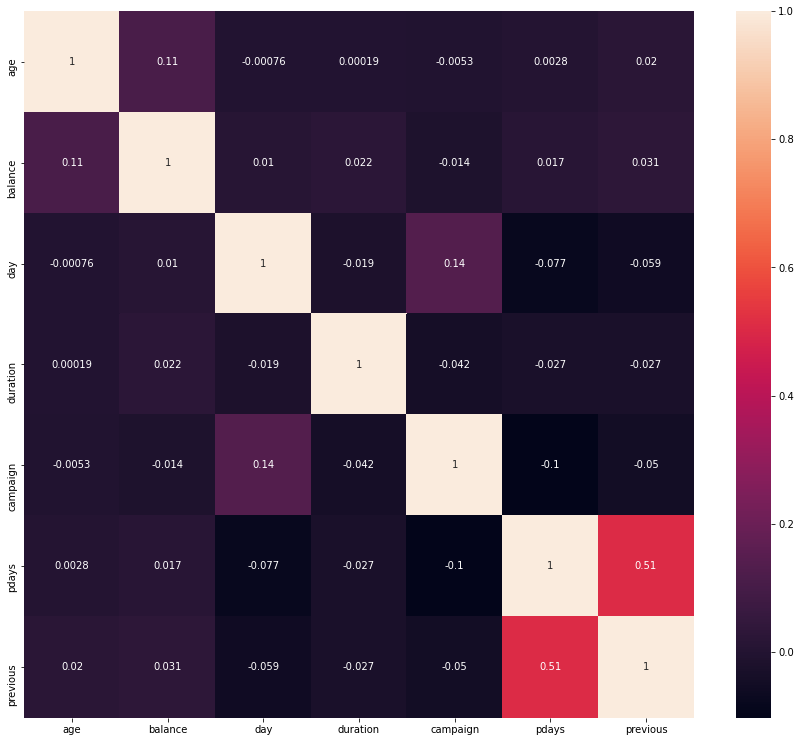

In [199]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr(),annot=True)

In [200]:
data = data.drop('duration',axis=1)

In [201]:
data

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,20,apr,1,-1,0,no
11158,39,services,married,secondary,no,733,no,no,16,jun,4,-1,0,no
11159,32,technician,single,secondary,no,29,no,no,19,aug,2,-1,0,no
11160,43,technician,married,secondary,no,0,no,yes,8,may,2,172,5,no


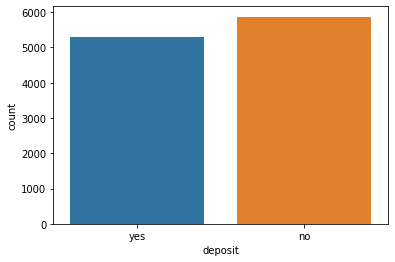

In [202]:
sns.countplot(x='deposit',data=data)

In [203]:

data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'campaign', 'pdays', 'previous', 'deposit'],
      dtype='object')

In [204]:
data["deposit"] = pd.Categorical(data["deposit"]).codes

In [205]:
data

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1,-1,0,1
1,56,admin.,married,secondary,no,45,no,no,5,may,1,-1,0,1
2,41,technician,married,secondary,no,1270,yes,no,5,may,1,-1,0,1
3,55,services,married,secondary,no,2476,yes,no,5,may,1,-1,0,1
4,54,admin.,married,tertiary,no,184,no,no,5,may,2,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,20,apr,1,-1,0,0
11158,39,services,married,secondary,no,733,no,no,16,jun,4,-1,0,0
11159,32,technician,single,secondary,no,29,no,no,19,aug,2,-1,0,0
11160,43,technician,married,secondary,no,0,no,yes,8,may,2,172,5,0


In [206]:
data.drop(['month','default','pdays',],axis=1,inplace=True)

In [207]:
data

,age,job,marital,education,balance,housing,loan,day,campaign,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,5,1,0,1
1,56,admin.,married,secondary,45,no,no,5,1,0,1
2,41,technician,married,secondary,1270,yes,no,5,1,0,1
3,55,services,married,secondary,2476,yes,no,5,1,0,1
4,54,admin.,married,tertiary,184,no,no,5,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,20,1,0,0
11158,39,services,married,secondary,733,no,no,16,4,0,0
11159,32,technician,single,secondary,29,no,no,19,2,0,0
11160,43,technician,married,secondary,0,no,yes,8,2,5,0


In [208]:
data.rename(columns={'deposit':'objectif'},inplace=True)

In [209]:
data

,age,job,marital,education,balance,housing,loan,day,campaign,previous,objectif
0,59,admin.,married,secondary,2343,yes,no,5,1,0,1
1,56,admin.,married,secondary,45,no,no,5,1,0,1
2,41,technician,married,secondary,1270,yes,no,5,1,0,1
3,55,services,married,secondary,2476,yes,no,5,1,0,1
4,54,admin.,married,tertiary,184,no,no,5,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,20,1,0,0
11158,39,services,married,secondary,733,no,no,16,4,0,0
11159,32,technician,single,secondary,29,no,no,19,2,0,0
11160,43,technician,married,secondary,0,no,yes,8,2,5,0


In [210]:

data.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'day', 'campaign', 'previous', 'objectif'],
      dtype='object')

In [211]:


data['housing'] = data['housing'].map({'yes': -1,'unknown': 0,'no': 1})
data['loan'] = data['loan'].map({'yes': -1,'unknown': 0,'no': 1})

In [212]:
nominal = ['job','marital','education']
dataProcessed = pd.get_dummies(data,columns=nominal)

dataProcessed.head()

,age,balance,housing,loan,day,campaign,previous,objectif,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,59,2343,-1,1,5,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,56,45,1,1,5,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,41,1270,-1,1,5,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
3,55,2476,-1,1,5,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
4,54,184,1,1,5,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [213]:
dataProcessed.columns

Index(['age', 'balance', 'housing', 'loan', 'day', 'campaign', 'previous',
       'objectif', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown'],
      dtype='object')

In [214]:
dataProcessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  11162 non-null  int64
 1   balance              11162 non-null  int64
 2   housing              11162 non-null  int64
 3   loan                 11162 non-null  int64
 4   day                  11162 non-null  int64
 5   campaign             11162 non-null  int64
 6   previous             11162 non-null  int64
 7   objectif             11162 non-null  int8 
 8   job_admin.           11162 non-null  uint8
 9   job_blue-collar      11162 non-null  uint8
 10  job_entrepreneur     11162 non-null  uint8
 11  job_housemaid        11162 non-null  uint8
 12  job_management       11162 non-null  uint8
 13  job_retired          11162 non-null  uint8
 14  job_self-employed    11162 non-null  uint8
 15  job_services         11162 non-null  uint8
 16  job_student          1

In [215]:
dataProcessed.shape

(11162, 27)

In [235]:

batch_size = 128
epochs = 40
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(27,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               3584      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 11,905
Trainable params: 11,905
Non-trainable params: 0
_________________________________________________________________


In [236]:
dataProcessed.columns

Index(['age', 'balance', 'housing', 'loan', 'day', 'campaign', 'previous',
       'objectif', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown'],
      dtype='object')

In [237]:
X = dataProcessed[['age', 'balance', 'housing', 'loan', 'day', 'campaign', 'previous',
       'objectif', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown']]  
Y= dataProcessed[["objectif"]]

In [238]:
X_train, X_test, y_train,y_test = train_test_split(X, Y, test_size = 0.2)

In [239]:

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"]) # Configure the model for training
history = model.fit(X_train, y_train, epochs=epochs )

Epoch 1/40
280/280 [==============================] - 0s 1ms/step - loss: 4.6221 - accuracy: 0.5662
Epoch 2/40
280/280 [==============================] - 0s 1ms/step - loss: 3.4421 - accuracy: 0.6472
Epoch 3/40
280/280 [==============================] - 0s 1ms/step - loss: 3.9025 - accuracy: 0.6890
Epoch 4/40
280/280 [==============================] - 0s 1ms/step - loss: 3.4009 - accuracy: 0.7395
Epoch 5/40
280/280 [==============================] - 0s 1ms/step - loss: 3.7211 - accuracy: 0.7451
Epoch 6/40
280/280 [==============================] - 0s 1ms/step - loss: 2.3274 - accuracy: 0.8077
Epoch 7/40
280/280 [==============================] - 0s 1ms/step - loss: 2.4768 - accuracy: 0.8149
Epoch 8/40
280/280 [==============================] - 0s 1ms/step - loss: 1.5608 - accuracy: 0.8638
Epoch 9/40
280/280 [==============================] - 0s 1ms/step - loss: 3.0779 - accuracy: 0.8113
Epoch 10/40
280/280 [==============================] - 0s 1ms/step - loss: 3.0454 - accuracy: 0.8258